🌱 Welcome to the Carbon Footprint Calculator 🌍


=== Your Annual Carbon Footprint ===
🔹 Transport: 1187.9 kg CO2
🔹 Home Energy: 64085.5 kg CO2
🔹 Diet: 1204.5 kg CO2
🔹 Consumer Goods: 25.0 kg CO2

🌍 Total: 66502.9 kg CO2/year
🌐 Earths Needed: 33.25

💡 Recommendations:
  ✓ Switch to renewable energy options like LED lighting. Try opening the window when it's hot. Wash clothes with cold water: saves 44859.9 kg CO2/year
  ✓ Upgrade to energy-efficient appliances: saves 12817.1 kg CO2/year
  ✓ Eat less red meat, try chicken, tofu, plant based milk, locally ground produce, chickpeas, etc: saves 292.0 kg CO2/year

✨ Reduced Footprint: 8534.0 kg CO2/year (87.2% less)

📊 Generating emissions chart...


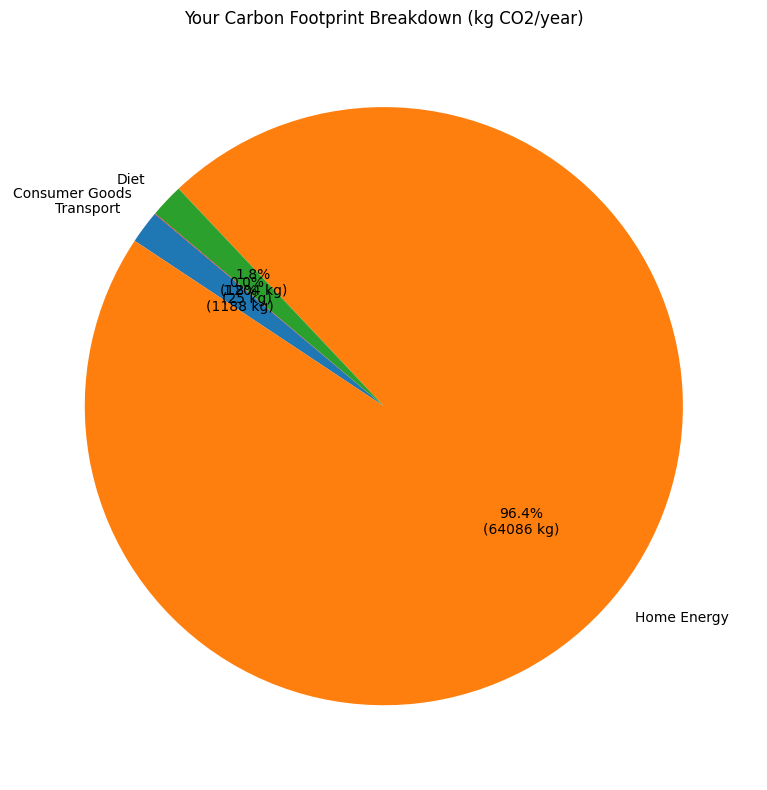

In [4]:
#!pip install matplotlib
import matplotlib.pyplot as plt
from enum import Enum
from typing import Dict, Tuple, List

# === ENUMS ===
# Predefined categories for diet and fuel types
class DietType(Enum):
    MEAT_HEAVY = "meat_heavy"
    AVERAGE = "average"
    PLANT_BASED = "plant_based"

class FuelType(Enum):
    GASOLINE = "gasoline"
    DIESEL = "diesel"
    ELECTRIC = "electric"
    HYBRID = "hybrid"

# === EMISSION FACTORS (kg CO2) ===
# Values based on environmental research, such as EPA and IPCC data
EMISSION_FACTORS = {
    "transport": {
        FuelType.GASOLINE.value: 8.89,    # kg CO2 per gallon
        FuelType.DIESEL.value: 10.16,
        FuelType.ELECTRIC.value: 0.05,    # per mile (grid-dependent)
        FuelType.HYBRID.value: 4.45,
        "transit": 0.2,                   # per passenger-mile
        "flight": 0.25                    # per passenger-mile
    },
    "electricity": {
        "national_average": 0.92,         # per kWh
        "renewable": 0.05
    },
    "natural_gas": 5.3,                   # per therm
    "diet": {
        DietType.MEAT_HEAVY.value: 3.3,   # per day
        DietType.AVERAGE.value: 2.5,
        DietType.PLANT_BASED.value: 1.5
    },
    "goods": 0.005                        # per $ spent
}

# === USER INPUT FUNCTIONS ===

def get_float_input(prompt: str, min_val: float = 0) -> float:
    """Prompt user for a float, enforcing a minimum value."""
    while True:
        try:
            value = float(input(prompt))
            if value >= min_val:
                return value
            print(f"Enter a number >= {min_val}")
        except ValueError:
            print("Invalid number, try again.")

def get_choice_input(prompt: str, valid_choices: list) -> str:
    """Prompt user for a string input within valid choices."""
    while True:
        choice = input(prompt).strip().lower()
        if choice in valid_choices:
            return choice
        print(f"Valid choices: {', '.join(valid_choices)}")

# === EMISSIONS CALCULATION FUNCTIONS ===

def calculate_transport_emissions(miles_per_week: float, mpg: float, fuel_type: str, 
                                  transit_miles: float = 0, flight_miles: float = 0) -> float:
    """Annual transport emissions from personal car, transit, and flights."""
    emissions = 0
    if fuel_type in [FuelType.GASOLINE.value, FuelType.DIESEL.value, FuelType.HYBRID.value]:
        gallons_per_year = (miles_per_week * 52) / mpg
        emissions += gallons_per_year * EMISSION_FACTORS["transport"][fuel_type]
    elif fuel_type == FuelType.ELECTRIC.value:
        emissions += miles_per_week * 52 * EMISSION_FACTORS["transport"][fuel_type]

    emissions += transit_miles * 52 * EMISSION_FACTORS["transport"]["transit"]
    emissions += flight_miles * EMISSION_FACTORS["transport"]["flight"]
    return emissions

def calculate_energy_emissions(electricity_kwh_month: float, gas_therms_month: float, 
                               renewable_energy: bool = False) -> float:
    """Annual household energy emissions (electricity + natural gas)."""
    electricity_factor = EMISSION_FACTORS["electricity"]["renewable"] if renewable_energy \
                         else EMISSION_FACTORS["electricity"]["national_average"]
    electricity_annual = electricity_kwh_month * 12 * electricity_factor
    gas_annual = gas_therms_month * 12 * EMISSION_FACTORS["natural_gas"]
    return electricity_annual + gas_annual

def calculate_diet_emissions(diet_type: str) -> float:
    """Annual emissions based on daily diet."""
    return 365 * EMISSION_FACTORS["diet"][diet_type]

def calculate_goods_emissions(annual_spending: float) -> float:
    """Annual emissions based on consumer goods spending."""
    return annual_spending * EMISSION_FACTORS["goods"]

# === SUGGESTIONS FOR REDUCTIONS ===

def suggest_reductions(user_data: Dict, current_emissions: Dict) -> Tuple[List[Tuple[str, float]], float]:
    """Suggests ways to reduce carbon emissions with savings."""
    suggestions = []

    # Transport suggestions
    if current_emissions["Transport"] > 2000:
        if user_data["fuel_type"] in [FuelType.GASOLINE.value, FuelType.DIESEL.value]:
            suggestions.append(("Switch to an electric vehicle", current_emissions["Transport"] * 0.5))
        suggestions.append(("Carpool or bike 2 days/week", current_emissions["Transport"] * 0.15))

    # Home energy suggestions
    if current_emissions["Home Energy"] > 3000:
        if not user_data["renewable_energy"]:
            suggestions.append(("Switch to renewable energy options like LED lighting. Try opening the window when it's hot. Wash clothes with cold water", current_emissions["Home Energy"] * 0.7))
        suggestions.append(("Upgrade to energy-efficient appliances", current_emissions["Home Energy"] * 0.2))

    # Diet
    if user_data["diet_type"] == DietType.MEAT_HEAVY.value:
        suggestions.append(("Eat less red meat, try chicken, tofu, plant based milk, locally ground produce, chickpeas, etc", 
            365 * (EMISSION_FACTORS["diet"][DietType.MEAT_HEAVY.value] - 
                   EMISSION_FACTORS["diet"][DietType.AVERAGE.value])))

    # Consumer goods
    if current_emissions["Consumer Goods"] > 1000:
        suggestions.append(("Reduce consumer spending by 20%", current_emissions["Consumer Goods"] * 0.2))

    total_savings = sum(s[1] for s in suggestions)
    return suggestions, total_savings

# === VISUALIZATION ===

def generate_emissions_chart(categories: Dict[str, float]):
    """Pie chart of annual carbon footprint by category."""
    filtered = {k: v for k, v in categories.items() if v > 0}
    if not filtered:
        print("No emissions to show.")
        return

    labels = list(filtered.keys())
    values = list(filtered.values())

    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct=lambda p: f'{p:.1f}%\n({p*sum(values)/100:.0f} kg)',
            startangle=140, textprops={'fontsize': 10})
    plt.title("Your Carbon Footprint Breakdown (kg CO2/year)")
    plt.tight_layout()
    plt.show()

# === DISPLAY RESULTS ===

def estimate_earths_needed(footprint_kg: float) -> float:
    """Estimate how many Earths would be needed to support this footprint."""
    return round(footprint_kg / 2000, 2)

def display_results(emissions: Dict[str, float], suggestions: List[Tuple[str, float]], 
                    total_savings: float):
    """Print results and suggestions to console."""
    total_emissions = sum(emissions.values())
    print("\n=== Your Annual Carbon Footprint ===")
    for category, kg in emissions.items():
        print(f"🔹 {category}: {kg:.1f} kg CO2")
    
    print(f"\n🌍 Total: {total_emissions:.1f} kg CO2/year")
    print(f"🌐 Earths Needed: {estimate_earths_needed(total_emissions)}")

    if suggestions:
        print("\n💡 Recommendations:")
        for desc, saved in suggestions:
            print(f"  ✓ {desc}: saves {saved:.1f} kg CO2/year")
        
        reduced = total_emissions - total_savings
        print(f"\n✨ Reduced Footprint: {reduced:.1f} kg CO2/year "
              f"({(total_savings / total_emissions * 100):.1f}% less)")

# === MAIN PROGRAM ===

def main():
    print("🌱 Welcome to the Carbon Footprint Calculator 🌍\n")
    
    # Collect user input
    user_data = {
        "miles_per_week": get_float_input("Personal vehicle miles/week: ", 0),
        "mpg": get_float_input("Vehicle MPG (or 50 for electric): ", 1),
        "fuel_type": get_choice_input("Fuel type (gasoline/diesel/electric/hybrid): ", 
                                      [f.value for f in FuelType]),
        "transit_miles": get_float_input("Weekly public transit miles (0 if none): ", 0),
        "flight_miles": get_float_input("Annual flight miles: ", 0),
        "electricity_kwh_month": get_float_input("Monthly electricity use (kWh): ", 0),
        "gas_therms_month": get_float_input("Monthly gas use (therms): ", 0),
        "renewable_energy": get_choice_input("Use renewable electricity? (y/n): ", ["y", "n"]) == "y",
        "diet_type": get_choice_input("Diet type (meat_heavy/average/plant_based): ", 
                                      [d.value for d in DietType]),
        "annual_spending": get_float_input("Annual consumer goods spending ($): ", 0)
    }

    # Calculate emissions
    emissions = {
        "Transport": calculate_transport_emissions(
            user_data["miles_per_week"], user_data["mpg"], user_data["fuel_type"],
            user_data["transit_miles"], user_data["flight_miles"]),
        "Home Energy": calculate_energy_emissions(
            user_data["electricity_kwh_month"], user_data["gas_therms_month"], 
            user_data["renewable_energy"]),
        "Diet": calculate_diet_emissions(user_data["diet_type"]),
        "Consumer Goods": calculate_goods_emissions(user_data["annual_spending"])
    }

    # Suggest ways to reduce
    suggestions, total_savings = suggest_reductions(user_data, emissions)

    # Display
    display_results(emissions, suggestions, total_savings)
    print("\n📊 Generating emissions chart...")
    generate_emissions_chart(emissions)

# Run program
if __name__ == "__main__":
    main()
